In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/chess/games.csv')
df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


take a look at the first few columns

In [2]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Clean the Dataset

1. Drop `id` Column
  
  **Reason**: The Game ID column is a unique identifier and doesn’t provide any predictive value.

2. Drop `increment_code` column

  **Reason**: Only interested in the outcome of the game

3. Drop `white_id` and `black_id` Columns
  
  **Reason**: Player IDs are just identifiers and don't contribute meaningfully to the prediction task. Analyzing specific players' performance trends is outside of the current scope.


In [32]:
# drop columns we're not interested in
df = df.drop(columns=["id", "white_id", "black_id", "increment_code"])

4. Transform `created_at` and `last_move_at` into a Single Column: `duration`
  
  **Reason**: The game duration can be a relevant feature, capturing how long the game lasted (e.g., shorter games might correlate with quick checkmates or resignations).

In [33]:
# calculate game duration and drop the original timestamp columns
df['created_at'] = pd.to_datetime(df['created_at']/1000, unit='s', origin='unix')
df['last_move_at'] = pd.to_datetime(df['last_move_at']/1000, unit='s', origin='unix')
df['duration'] = (df['last_move_at'] - df['created_at']).dt.total_seconds()
df = df.drop(columns=["created_at", "last_move_at"])

5. Drop `moves` Column
  
  **Reason**: The `moves` column contains move sequences, which we are not planning to use initially. It’s high-dimensional and computationally expensive to process for simple predictions.

6. Drop `opening_name` Column
  
  **Reason**: redundant with `opening_eco`

In [34]:
# drop the 'moves' column
df = df.drop(columns=["moves"])
# drop the 'opening_name' column
df = df.drop(columns=["opening_name"])

7. Add a new column for the rating difference: `rating_diff = white_player_rating - black_player_rating`.
8. Normalize ratings by dividing by scaling between `0` and `1` to improve model performance.

In [35]:
def normalize(col):
    return (col - col.mean()) / col.std()

In [36]:
# create a new column for rating difference
df['rating_diff'] = df['white_rating'] - df['black_rating']

# normalize white and black ratings
df['white_rating_normalized'] = normalize(df['white_rating'])
df['black_rating_normalized'] = normalize(df['black_rating'])
df['rating_diff_normalized'] = normalize(df['rating_diff'])
df['turns_normalized'] = normalize(df['turns'])
df['duration_normalized'] = normalize(df['duration'])

In [37]:
from sklearn.preprocessing import LabelEncoder
# encode 'victory_status' using LabelEncoder
label_encoder = LabelEncoder()
df['victory_status_encoded'] = label_encoder.fit_transform(df['victory_status'])

# calculate the frequency of each 'opening_eco' value
eco_frequency = df['opening_eco'].value_counts()
# create a mapping of 'opening_eco' to labels based on frequency
eco_frequency_mapping = {eco: idx for idx, eco in enumerate(eco_frequency.index)}
# apply the mapping to the 'opening_eco' column
df['opening_eco_encoded'] = df['opening_eco'].map(eco_frequency_mapping)

# encode `rated` boolean column
df['rated_encoded'] = df['rated'].map({True: 1, False: 0})

In [9]:
df.describe(include='all')

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_ply,duration,rating_diff,white_rating_normalized,black_rating_normalized,rating_diff_normalized,turns_normalized,duration_normalized,victory_status_encoded,opening_eco_encoded,rated_encoded
count,20058,20058.000000,20058,20058,20058.000000,20058.000000,20058,20058.000000,20058.000000,20058.000000,2.005800e+04,2.005800e+04,2.005800e+04,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000
unique,2,NaN,4,3,NaN,NaN,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,resign,white,NaN,NaN,A00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16155,NaN,11147,10001,NaN,NaN,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.465999,NaN,NaN,1596.631868,1588.831987,NaN,4.816981,869.707050,7.799880,-1.700371e-17,-3.117348e-16,-2.125464e-17,2.833952e-17,1.487825e-17,2.150065,40.130671,0.805414
std,NaN,33.570585,NaN,NaN,291.253376,291.036126,NaN,2.797152,4814.222091,249.036667,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.014535,54.214763,0.395891
min,NaN,1.000000,NaN,NaN,784.000000,789.000000,NaN,1.000000,0.000000,-1605.000000,-2.790120e+00,-2.748222e+00,-6.476154e+00,-1.771372e+00,-1.806537e-01,0.000000,0.000000,0.000000
25%,NaN,37.000000,NaN,NaN,1398.000000,1391.000000,NaN,3.000000,0.000000,-108.000000,-6.819899e-01,-6.797506e-01,-4.649913e-01,-6.990048e-01,-1.806537e-01,1.000000,6.000000,1.000000
50%,NaN,55.000000,NaN,NaN,1567.000000,1562.000000,NaN,4.000000,240.612000,3.000000,-1.017391e-01,-9.219470e-02,-1.927379e-02,-1.628211e-01,-1.306743e-01,3.000000,18.000000,1.000000
75%,NaN,79.000000,NaN,NaN,1793.000000,1784.000000,NaN,6.000000,793.171250,122.000000,6.742175e-01,6.705972e-01,4.585675e-01,5.520905e-01,-1.589785e-02,3.000000,52.000000,1.000000


In [10]:
df.head().to_csv()

',rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_ply,duration,rating_diff,white_rating_normalized,black_rating_normalized,rating_diff_normalized,turns_normalized,duration_normalized,victory_status_encoded,opening_eco_encoded,rated_encoded\n0,False,13,outoftime,white,1500,1191,D10,5,0.0,309,-0.3317793908464707,-1.3669505320835458,1.2094609347792442,-1.413916348271147,-0.18065370337658582,2,44,0\n1,True,16,resign,black,1322,1261,B00,4,0.0,61,-0.9429311055676121,-1.1264305630624478,0.21362364171707066,-1.324552399980556,-0.18065370337658582,3,7,1\n2,True,61,mate,white,1496,1500,C20,3,0.0,-4,-0.34551313724469856,-0.3052266688332699,-0.047382100416160346,0.015906824378311618,-0.18065370337658582,1,5,1\n3,True,61,mate,white,1439,1454,D02,3,0.0,-15,-0.5412190234194462,-0.46328264847570577,-0.09155230293101482,0.015906824378311618,-0.18065370337658582,1,11,1\n4,True,95,mate,white,1523,1469,C41,5,0.0,54,-0.2528103490566603,-0.4117426551140419,0.18551533102579962

## Logistic Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [39]:
# define the feature columns (use only numeric columns, especially the "encoded" ones)
feature_columns = [
    'turns_normalized',
    'duration_normalized',
    'rating_diff_normalized',
    'white_rating_normalized',
    'black_rating_normalized',
    'victory_status_encoded',
    'opening_ply',
    'rated_encoded',
    'opening_eco_encoded'
]

X = df[feature_columns]

# encode the target variable ('winner')
y = df['winner'].map({'white': 0, 'black': 1, 'draw': 2})

## Check for Multicollinearity with correlation matrix

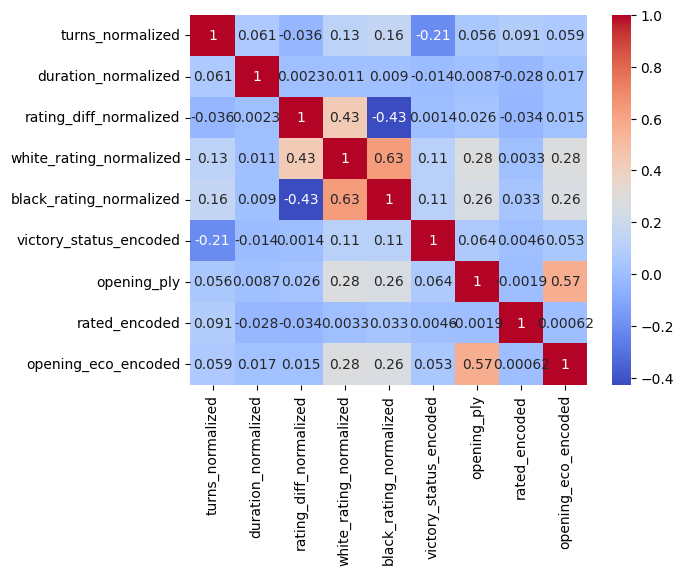

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the correlation matrix
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Resolving correlated features
White and Black rank are understandably moderately correlated (players may tend to play opponents with of similar experience). I think it's ok to just drop these columns, since I'm really interested in the rating diff

`opening_eco_encoded` and `opening_ply_encoded` are also moderately correlated, so I will apply PCA to reduce dimensionality in the data set

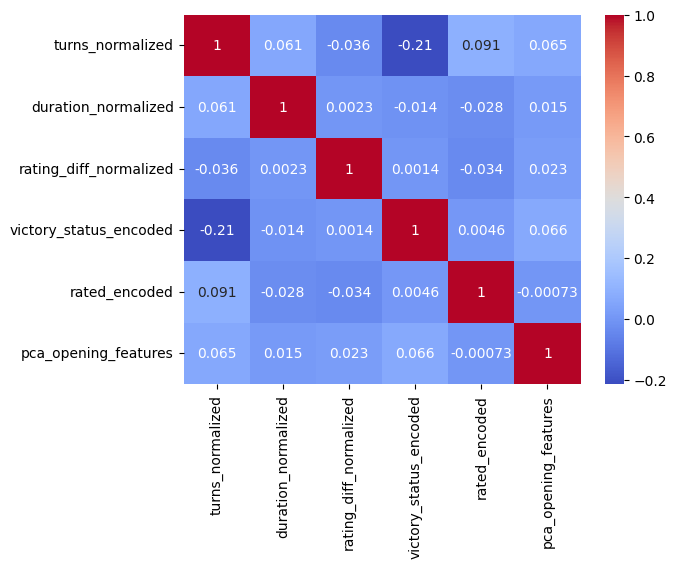

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_for_pca = df[['opening_ply', 'opening_eco_encoded']]
scaler = StandardScaler()
features_for_pca_scaled = scaler.fit_transform(features_for_pca)

pca = PCA(n_components=1)  # Combine into a single principal component
pca_feature = pca.fit_transform(features_for_pca_scaled)

# add the PCA result back to the DataFrame
df['pca_opening_features'] = pca_feature

# define updated feature columns
feature_columns = [
    'turns_normalized',
    'duration_normalized',
    'rating_diff_normalized',
    'victory_status_encoded',
    'rated_encoded',
    'pca_opening_features'
]

X = df[feature_columns]

# Check the correlation matrix
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [42]:
# split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [43]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6727318045862413
Confusion Matrix:
 [[1454  550    0]
 [ 752 1064    0]
 [   3    8  181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69      2004
           1       0.66      0.59      0.62      1816
           2       1.00      0.94      0.97       192

    accuracy                           0.67      4012
   macro avg       0.77      0.75      0.76      4012
weighted avg       0.67      0.67      0.67      4012



In [44]:
df['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

Draw predictions were suspiciously accurate, then I realized one of the `victory_status` values is `draw`. This column is leaking the answer in some cases, so I'm going to remove it

In [45]:
# define updated feature columns
feature_columns = [
    'turns_normalized',
    'duration_normalized',
    'rating_diff_normalized',
#     'victory_status_encoded', omitted this time
    'rated_encoded',
    'pca_opening_features'
]

X = df[feature_columns]

# split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6273678963110668
Confusion Matrix:
 [[1453  551    0]
 [ 757 1059    0]
 [  90   97    5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      2004
           1       0.62      0.58      0.60      1816
           2       1.00      0.03      0.05       192

    accuracy                           0.63      4012
   macro avg       0.75      0.44      0.44      4012
weighted avg       0.64      0.63      0.61      4012



This model is very poor at classifying draws. Perhaps this is because the dataset is skewed toward definitive outcomes. I'd like to see how a binary classifier model performs by dropping rows with draws.

(19108,)


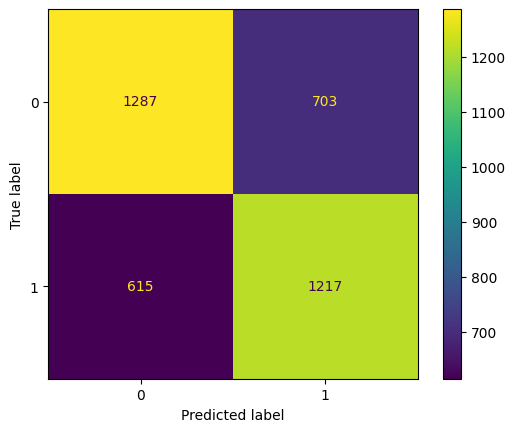

Accuracy: 0.6551543694400838
Confusion Matrix:
 [[1287  703]
 [ 615 1217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66      1990
           1       0.63      0.66      0.65      1832

    accuracy                           0.66      3822
   macro avg       0.66      0.66      0.66      3822
weighted avg       0.66      0.66      0.66      3822



In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
# drop rows with no winner
df_binary = df[df['winner'] != 'draw']

# define updated feature columns
feature_columns = [
    'turns_normalized',
    'duration_normalized',
    'rating_diff_normalized',
    # 'victory_status_encoded', # include this column again
    'rated_encoded',
    'pca_opening_features'
]

X = df_binary[feature_columns]

# update labels
y = df_binary['winner'].map({'white': 0, 'black': 1})
print(y.shape)

# split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')

# train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Try scaling features to see if it improves the model

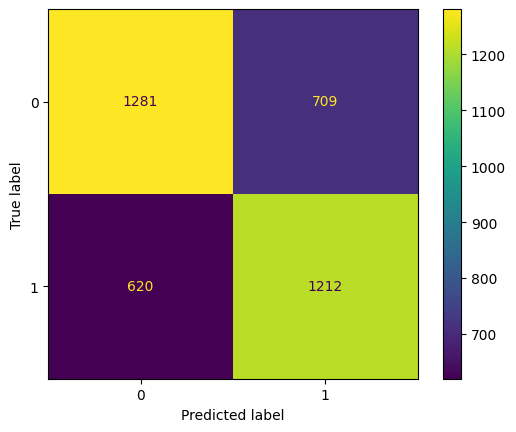

Accuracy: 0.652276295133438
Confusion Matrix:
 [[1281  709]
 [ 620 1212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66      1990
           1       0.63      0.66      0.65      1832

    accuracy                           0.65      3822
   macro avg       0.65      0.65      0.65      3822
weighted avg       0.65      0.65      0.65      3822



In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

## VS Picking Higher-Rated Player

The model is a little better than choosing randomly, but is it better than choosing the player with the higher rating?

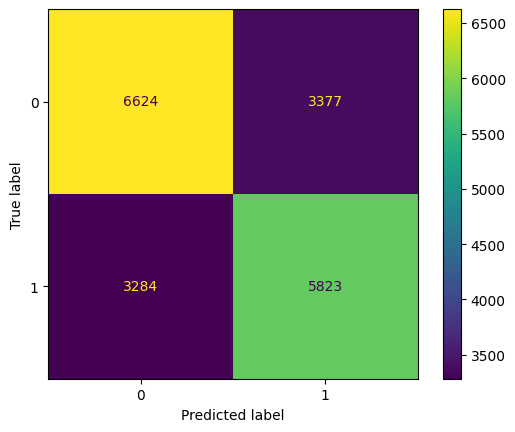

Heuristic Accuracy: 0.6514025539041239
Heuristic Confusion Matrix:
 [[6624 3377]
 [3284 5823]]
Heuristic Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.67     10001
           1       0.63      0.64      0.64      9107

    accuracy                           0.65     19108
   macro avg       0.65      0.65      0.65     19108
weighted avg       0.65      0.65      0.65     19108



In [28]:
# predict white if higher or equal rating to black, otherwise predict black
predict_based_on_rating = (df_binary['rating_diff'] < 0).astype(int)

ConfusionMatrixDisplay.from_predictions(y, predict_based_on_rating)
plt.show()

# Accuracy
heuristic_accuracy = accuracy_score(y, predict_based_on_rating)
print("Heuristic Accuracy:", heuristic_accuracy)

# Confusion Matrix
print("Heuristic Confusion Matrix:\n", confusion_matrix(y, predict_based_on_rating))

# Classification Report
print("Heuristic Classification Report:\n", classification_report(y, predict_based_on_rating))

Our model does not seem to meaningfully improve the prediction over just picking the higher-rated player. Let's experiment and see if adding any features to rating help.

In [22]:
# define updated feature columns
feature_columns = [
    'turns_normalized',
#     'duration',
    'rating_diff_normalized',
#     'victory_status_encoded',
#     'rated_encoded',
    'pca_opening_features'
]

X = df_binary[feature_columns]

# update labels
y = df_binary['winner'].map({'white': 0, 'black': 1})

# split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')

# train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6554160125588697
Confusion Matrix:
 [[1285  705]
 [ 612 1220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66      1990
           1       0.63      0.67      0.65      1832

    accuracy                           0.66      3822
   macro avg       0.66      0.66      0.66      3822
weighted avg       0.66      0.66      0.66      3822



# Decision Tree Classifier

Now try a Decision Tree classifier to compare with logistic regression approach

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# load the dataset again, so we have something without modifications
df = pd.read_csv('/kaggle/input/chess/games.csv')

# create duration column
df['created_at'] = pd.to_datetime(df['created_at']/1000, unit='s', origin='unix')
df['last_move_at'] = pd.to_datetime(df['last_move_at']/1000, unit='s', origin='unix')
df['duration'] = (df['last_move_at'] - df['created_at']).dt.total_seconds()

# create rating difference column
df['rating_diff'] = df['white_rating'] - df['black_rating']

# binary-encode rated column
df['rated_encoded'] = df['rated'].map({True: 1, False: 0})

# drop rows with no winner
df_binary = df[df['winner'] != 'draw']

df_encoded = pd.get_dummies(df_binary, columns=['victory_status'])
df_encoded.describe(include="all")

# define updated feature columns
feature_columns = [
    'turns',
    'duration',
    'rating_diff',
#     'victory_status_mate',
#     'victory_status_outoftime',
#     'victory_status_resign',
#     'rated_encoded',
#     'opening_eco',
    'opening_ply'
]

X = df_encoded[feature_columns]

# update labels
y = df_encoded['winner'].map({'white': 0, 'black': 1})

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=77)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7537938252223967
Confusion Matrix:
 [[1507  483]
 [ 458 1374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      1990
           1       0.74      0.75      0.74      1832

    accuracy                           0.75      3822
   macro avg       0.75      0.75      0.75      3822
weighted avg       0.75      0.75      0.75      3822



Try incorporating the opening by frequency encoding values

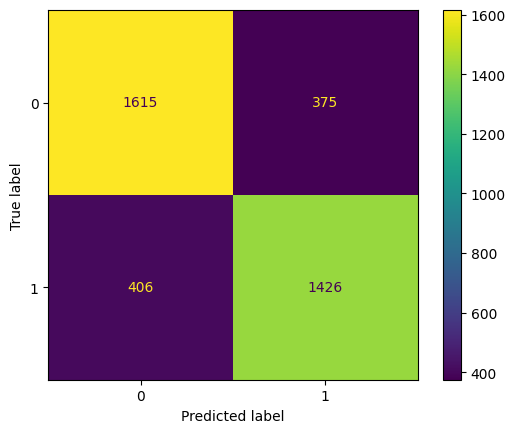

Accuracy: 0.7956567242281528
Confusion Matrix:
 [[1615  375]
 [ 406 1426]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1990
           1       0.79      0.78      0.79      1832

    accuracy                           0.80      3822
   macro avg       0.80      0.79      0.80      3822
weighted avg       0.80      0.80      0.80      3822



In [29]:
opening_popularity = df['opening_eco'].value_counts(normalize=True)
df_encoded['opening_popularity'] = df['opening_eco'].map(opening_popularity)

# define updated feature columns
feature_columns = [
    'turns',
#     'duration',
    'rating_diff',
#     'rated_encoded',
#     'opening_popularity'
]

X = df_encoded[feature_columns]

# update labels
y = df_encoded['winner'].map({'white': 0, 'black': 1})

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=77)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

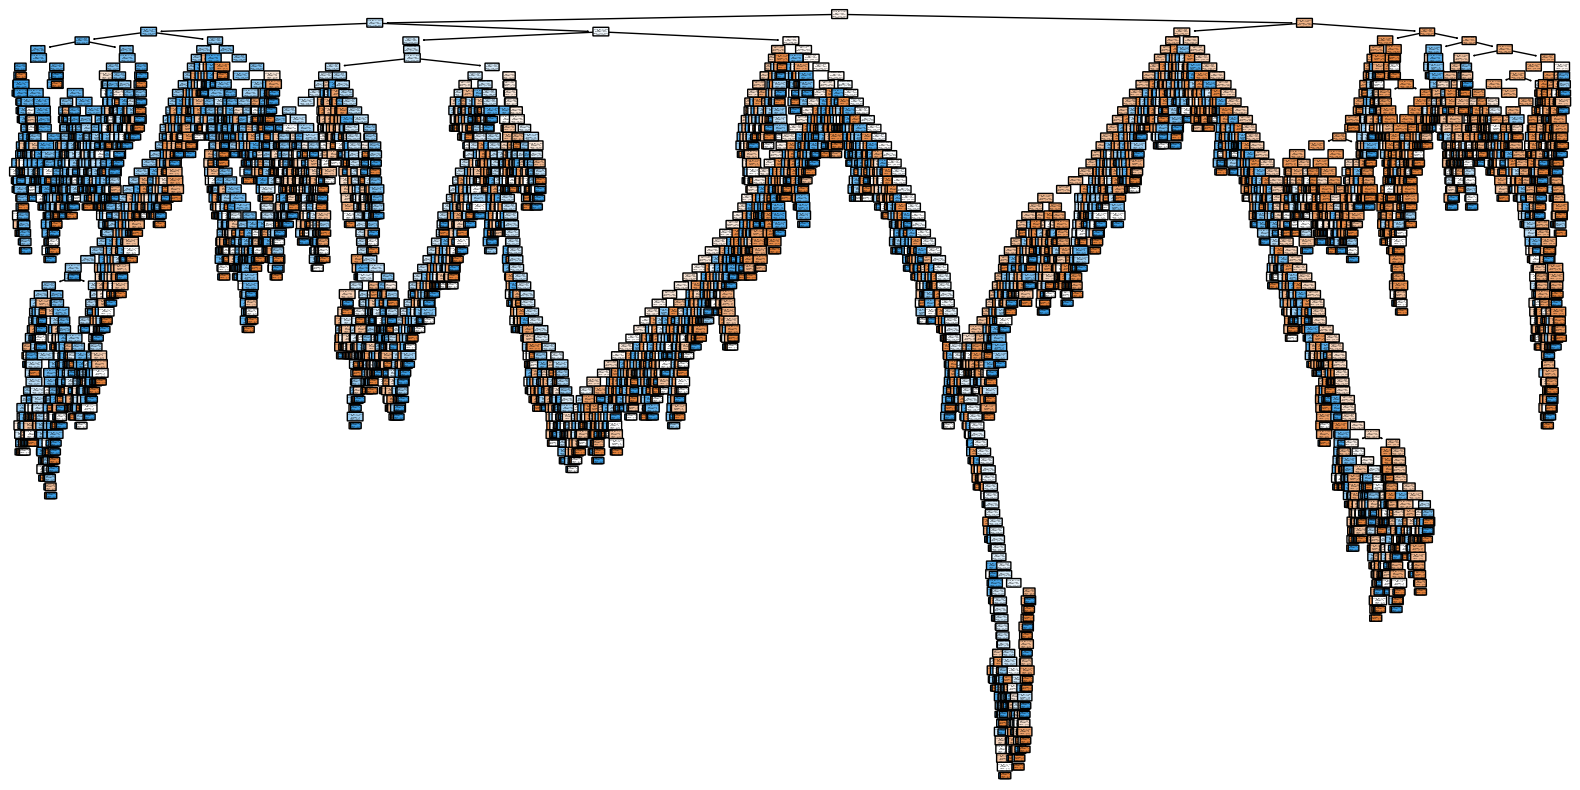

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_columns, class_names=['White', 'Black'], filled=True, rounded=True)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Perform the grid search
grid_search.fit(X, y)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.7925495324455957
